## Latar Belakang

Data yang digunakan dalam analisis ini adalah data orderan E-commerce terbesar di Pakistan. Data-nya diambil dari bulan Maret 2016 sampai Agustus 2018. E-commerce ini membutuhkan analisis mengenai penjualan agar penjualan tersebut meningkat dari tahun ke tahun. Maka dari itu analisis ini dilakukan untuk mengetahui faktor apa saja yang berkaitan untuk mencapai tujuan tersebut.

## Pernyataan Masalah
Sebagai data analyst, kita ingin mengetahui **Bagaimana cara meningkatkan penjualan dengan mengetahui ciri-ciri transaksi yang menghasilkan penjualan yang tinggi?**

## Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi 20 kolom yaitu:  

* item_id : ID dari tiap item
* status: status dari transaksi
* created_at : tanggal terjadinya transaksi
* sku: kode barang
* price: harga barang
* qty_ordered: jumlah barang yang diorder
* grand_total: harga barang dikali jumlah barang yang diorder
* increment_id : kode transaksi
* category_name_1: kategori barang
* discount_amount: jumlah diskon yang diberikan
* payment_method: cara pembayaran 
* Working Date: tanggal terjadinya transaksi
* BI Status: -
* MV: -
* Year: tahun transaksi
* Month: bulan transaksi
* Customer Since: tahun dimana pertama kali melakukan transaksi
* M-Y: bulan dan tahun transaksi
* FY : fiscal year
* Customer ID : ID pelanggan

Berikut 5 baris teratas dan terbawah dari dataset Pakistan Largest Ecommerce.

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')

In [4]:
display(df.head(),df.tail())

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['increment_id'].value_counts()

100266667    72
100286851    47
100346364    45
100476608    43
100535753    41
             ..
100289486     1
100289488     1
100289484     1
100289487     1
100352201     1
Name: increment_id, Length: 408785, dtype: int64

In [6]:
df.isna().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

## Melihat sebaran missing value di dalam data

<AxesSubplot:>

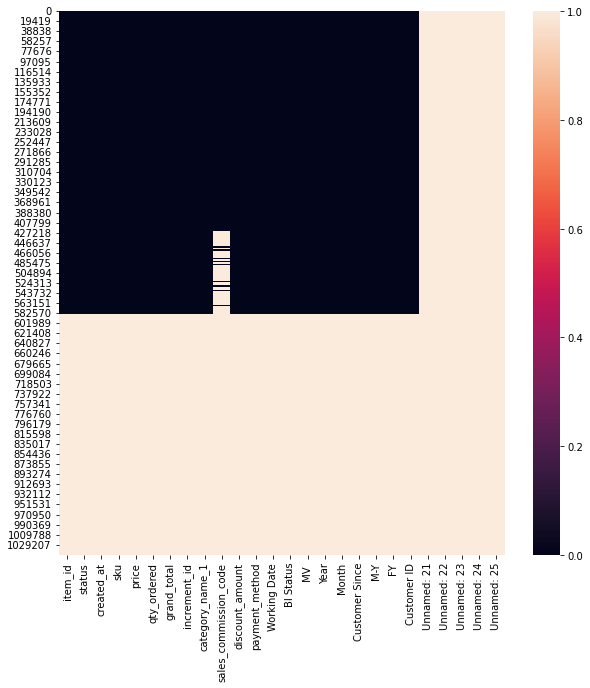

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

Dari map diatas kita bisa melihat kolom 'Unnamed: 21','Unnamed: 22', 'Unnamed: 23','Unnamed: 24', 'Unnamed: 25' adalah kolom kosong yang tidak memiliki data apapun dan tidak ada informasi yang kita peroleh dari kolom-kolom tersebut. Oleh karena itu kita harus menghapus kolom tersebut. 

In [8]:
df = df.drop(columns=['Unnamed: 21','Unnamed: 22', 'Unnamed: 23','Unnamed: 24', 'Unnamed: 25'])
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


Selain itu saya akan menghapus baris yang seluruh isinya missing.

In [9]:
df = df.dropna(how='all')
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

Jumlah missing values yang tersisa yaitu:

In [11]:
df.isna().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

In [12]:
df['sales_commission_code'].unique()

array(['\\N', 'R-FSD-52352', '105259', ..., 'GRS-4090974-1',
       'GRS-4090975-1', '100559728'], dtype=object)

Dibawah ini saya mengecek ada berapa missing value yang tidak terbaca sebagai NaN pada kolom 'sales_commission_code'

In [13]:
(df['sales_commission_code'] == '\\N').sum()

339001

Untuk kolom 'sales_commission_code' sebagian besar datanya null dan mempunyai missing value. Oleh karena itu kolom ini saya memilih untuk di drop saja.

In [14]:
df = df.drop(columns=['sales_commission_code'])
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


#### Mengisi missing values pada 'status'

In [15]:
df['status'] = df['status'].fillna(df['status'].mode()[0]) #karena kategorikal
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


In [16]:
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', 'processing', 'payment_review'],
      dtype=object)

In [17]:
df[df['status']== '\\N'].index

Int64Index([255520, 255521, 255624, 255625], dtype='int64')

In [18]:
df = df.drop(index=df[df['status']== '\\N'].index)
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


#### Menghapus baris yang sku-nya missing (nan)

In [19]:
#Mengecek di baris berapa yg ada missing valuenya menggunakan index

df[df['sku'].isna()].index

Int64Index([ 14846,  20676,  39838,  39839,  39880, 124968, 125636, 125811,
            149597, 170249, 170401, 173040, 173045, 173069, 175411, 238273,
            316422, 325391, 325402, 325602],
           dtype='int64')

In [20]:
df = df.drop(index=df[df['sku'].isna()].index)
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


#### Mengisi missing values pada 'category_name'

Disini saya membuat dataframe baru bernama df_catname_kosong yang berisi data dengan 'category_name_1' yang missing

In [21]:
df_catname_kosong = df[df['category_name_1'].isna()]
df_catname_kosong.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
425895,725194.0,order_refunded,1/2/2018,MEFQMO59B0942707B79-L,99.0,2.0,2.0,100442474,NaN,346.0,Easypay,1/2/2018,Valid,198,2018.0,1.0,2017-8,1-2018,FY18,59587.0
431194,731122.0,received,1/15/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100445690,NaN,0.0,cod,1/15/2018,Valid,99,2018.0,1.0,2017-8,1-2018,FY18,59587.0
432492,732569.0,canceled,1/19/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446481,NaN,0.0,bankalfalah,1/19/2018,Gross,99,2018.0,1.0,2017-3,1-2018,FY18,37311.0
432494,732572.0,canceled,1/19/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446483,NaN,0.0,bankalfalah,1/19/2018,Gross,99,2018.0,1.0,2017-3,1-2018,FY18,37311.0
432496,732575.0,order_refunded,1/19/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446485,NaN,0.0,cod,1/19/2018,Valid,99,2018.0,1.0,2018-1,1-2018,FY18,85633.0


Disini saya membuat kolom baru bernama 'sku_code' yang berfungsi untuk menampilkan 3 karakter awal yang ada di kolom 'sku'

In [22]:
# 3 huruf depan dari sku yg catname-nya kosong

df_catname_kosong['sku'].apply(lambda kata: kata[0:3]).value_counts()

MEF    90
OTH    65
COM     4
WOF     2
MAT     1
BAG     1
KAB     1
Name: sku, dtype: int64

In [23]:
df['sku_code'] = df['sku'].apply(lambda kata: kata[0:3])

In [24]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,sku_code
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,kre
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,kcc
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,Ego
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,kcc
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,BK7


Sekarang kolom 'sku_code' sudah ada

Selanjutnya saya akan mengisi kolom 'category_name_1' berdasarkan 'sku_code'nya

In [25]:
df.loc[df['sku_code'] == 'MEF', 'category_name_1']

299862    Men's Fashion
299863    Men's Fashion
299864    Men's Fashion
299950    Men's Fashion
299973    Men's Fashion
              ...      
584507    Men's Fashion
584508    Men's Fashion
584509    Men's Fashion
584514    Men's Fashion
584515    Men's Fashion
Name: category_name_1, Length: 40387, dtype: object

In [26]:
df.loc[df['sku_code'] == 'MEF', 'category_name_1'] = df.loc[df['sku_code'] == 'MEF', 'category_name_1'].fillna("Men's Fashion")

In [27]:
df.loc[df['sku_code'] == 'OTH', 'category_name_1']

263522    Others
263528    Others
263530    Others
263632    Others
263633    Others
           ...  
582386    Others
582387    Others
583158    Others
583159    Others
583371    Others
Name: category_name_1, Length: 26287, dtype: object

In [28]:
df.loc[df['sku_code'] == 'OTH', 'category_name_1'] = df.loc[df['sku_code'] == 'OTH', 'category_name_1'].fillna('Others')

In [29]:
df.loc[df['sku_code'] == 'COM', 'category_name_1']

300021    Computing
300397    Computing
300768    Computing
300786    Computing
300815    Computing
            ...    
584331    Computing
584332    Computing
584432    Computing
584433    Computing
584487    Computing
Name: category_name_1, Length: 8052, dtype: object

In [30]:
df.loc[df['sku_code'] == 'COM', 'category_name_1'] = df.loc[df['sku_code'] == 'COM', 'category_name_1'].fillna('Computing')

In [31]:
df.loc[df['sku_code'] == 'WOF', 'category_name_1']

299910    Women's Fashion
299911    Women's Fashion
299997    Women's Fashion
300003    Women's Fashion
300004    Women's Fashion
               ...       
584482    Women's Fashion
584483    Women's Fashion
584517    Women's Fashion
584518    Women's Fashion
584519    Women's Fashion
Name: category_name_1, Length: 27882, dtype: object

In [32]:
df.loc[df['sku_code'] == 'WOF', 'category_name_1'] = df.loc[df['sku_code'] == 'WOF', 'category_name_1'].fillna("Women's Fashion")

In [33]:
df.loc[df['sku_code'] == 'MAT', 'category_name_1']

299948    Mobiles & Tablets
299967    Mobiles & Tablets
299979    Mobiles & Tablets
299988    Mobiles & Tablets
300030    Mobiles & Tablets
                ...        
584516    Mobiles & Tablets
584520    Mobiles & Tablets
584521    Mobiles & Tablets
584522    Mobiles & Tablets
584523    Mobiles & Tablets
Name: category_name_1, Length: 61203, dtype: object

In [34]:
df.loc[df['sku_code'] == 'MAT', 'category_name_1'] = df.loc[df['sku_code'] == 'MAT', 'category_name_1'].fillna('Mobiles & Tablets')

In [35]:
df.loc[df['sku_code'] == 'BAG', 'category_name_1']

299735    Beauty & Grooming
299971    Beauty & Grooming
300005    Beauty & Grooming
300006    Beauty & Grooming
300010    Beauty & Grooming
                ...        
584437    Beauty & Grooming
584463    Beauty & Grooming
584468    Beauty & Grooming
584481    Beauty & Grooming
584490    Beauty & Grooming
Name: category_name_1, Length: 17680, dtype: object

In [36]:
df.loc[df['sku_code'] == 'BAG', 'category_name_1'] = df.loc[df['sku_code'] == 'BAG', 'category_name_1'].fillna('Beauty & Grooming')

In [37]:
df.loc[df['sku_code'] == 'KAB', 'category_name_1'].head(3)

299926    Kids & Baby
300092    Kids & Baby
300286    Kids & Baby
Name: category_name_1, dtype: object

In [38]:
df.loc[df['sku_code'] == 'KAB', 'category_name_1'] = df.loc[df['sku_code'] == 'KAB', 'category_name_1'].fillna('Kids & Baby')

In [39]:
df['category_name_1'].value_counts()

Mobiles & Tablets     115711
Men's Fashion          92311
Women's Fashion        59723
Appliances             52413
Superstore             43613
Beauty & Grooming      41497
Soghaat                34011
Others                 29283
Home & Living          26504
Entertainment          26323
Health & Sports        17502
Kids & Baby            16495
Computing              15937
\N                      7829
School & Education      3478
Books                   1870
Name: category_name_1, dtype: int64

Ternyata di kolom category_name_1 masih ada yang missing(\N). Dibawah ini saya akan menghapus data missing tersebut

In [40]:
df[df['category_name_1']== '\\N'].index

Int64Index([    24,     72,     79,     80,     81,     99,    109,    137,
               144,    148,
            ...
            420193, 421428, 422952, 422961, 422965, 423207, 423231, 423826,
            423829, 423830],
           dtype='int64', length=7829)

In [41]:
df = df.drop(index=df[df['category_name_1']== '\\N'].index)
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,sku_code
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,kre
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,kcc
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,Ego
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,kcc
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,BK7


#### Menghapus missing values pada 'Customer Since' & 'Customer ID'

In [42]:
#Mengecek di baris berapa yg ada missing valuenya menggunakan index

df[df['Customer Since'].isna()].index

Int64Index([427377, 427378, 427379, 437567, 478699, 478779, 494278, 495340,
            495945, 496921, 502446],
           dtype='int64')

In [43]:
df[df['Customer ID'].isna()].index

Int64Index([427377, 427378, 427379, 437567, 478699, 478779, 494278, 495340,
            495945, 496921, 502446],
           dtype='int64')

Setelah saya cek ternyata missing value di kolom 'Customer Since' & 'Customer ID' berada di index yang sama. Oleh karena itu saya menghapusnya secara bersamaan.

In [44]:
df = df.drop(index=df[df['Customer Since'].isna()].index)

In [45]:
df['BI Status'].value_counts()

Net      230949
Gross    198279
Valid    147431
#REF!         1
Name: BI Status, dtype: int64

Di kolom 'BI Status' ternyata ada satu outlier berupa kategori #REF!

In [46]:
df[df['BI Status']=='#REF!']

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,sku_code
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,kre


Saya akan menghapus data yang outlier tadi karena datanya hanya satu baris

In [47]:
df.drop([0], axis=0, inplace=True) #REF! berada dibaris index 0

In [48]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,sku_code
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,kcc
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,Ego
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,kcc
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,BK7
5,211137.0,canceled,7/1/2016,UK_Namkino All In One 200 Gms,80.0,1.0,80.0,100147448,Soghaat,0.0,cod,7/1/2016,Gross,80,2016.0,7.0,2016-7,7-2016,FY17,6.0,UK_


Mengecek kolom 'Working Date' isinya sama dengan 'created at' atau tidak

In [49]:
df[['created_at', 'Working Date']].sample(20)

,created_at,Working Date
354098,11/18/2017,11/18/2017
70141,11/22/2016,11/22/2016
463491,2/27/2018,2/27/2018
201714,5/4/2017,5/4/2017
503393,3/28/2018,3/28/2018
144015,1/23/2017,1/23/2017
582900,8/21/2018,8/21/2018
219548,5/20/2017,5/20/2017
560963,6/29/2018,6/29/2018
510854,4/12/2018,4/12/2018


Ternyata kedua kolom tersebut isinya sama persis. Selanjutnya saya akan menghapus kolom 'created_at' karena isi kolom tersebut sama dengan kolom 'Working Date'

In [50]:
df = df.drop(columns=['created_at'])
df.head()

,item_id,status,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,sku_code
1,211133.0,canceled,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,kcc
2,211134.0,canceled,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,Ego
3,211135.0,complete,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,kcc
4,211136.0,order_refunded,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,BK7
5,211137.0,canceled,UK_Namkino All In One 200 Gms,80.0,1.0,80.0,100147448,Soghaat,0.0,cod,7/1/2016,Gross,80,2016.0,7.0,2016-7,7-2016,FY17,6.0,UK_


Kemudian saya menambah kolom baru yaitu 'discount'

In [51]:
df['discount'] = df['discount_amount'] / df['price'] * 100

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana cara meningkatkan penjualan dengan mengetahui ciri-ciri transaksi dengan menghasilkan total penjualan yang tinggi?** 

1. Mencari jumlah order berdasarkan status
2. Kategori apa yg paling banyak di cancel
3. Kategori apa yang paling banyak di terjual (complete)
4. Mencari kategori barang apa yang paling banyak terjual(complete) berdasarkan penjualan(grand_total) tertinggi 
5. Mencari metode pembayaran(payment_method) apa yang paling sering digunakan berdasarkan penjualan (grand_total) tertinggi
6. Bulan ke berapa transaksi paling banyak berdasarkan penjualan (grand_total) tertinggi
7. Mencari barang apa yg paling tinggi penjualannya di tiap tahun
8. Kategori apa yang paling sering discount

### 1. Mencari jumlah order berdasarkan status

Disini saya akan mengelompokkan status pembayaran menjadi 3 yaitu Complete, Cancel dan Pending

In [52]:
status_complete = ['complete', 'received','cod', 'paid', 'closed']
status_cancel = ['canceled', 'order_refunded', 'refund', 'fraud', 'exchange']
status_pending = ['payment_review', 'pending', 'processing', 'holded', 'pending_paypal']

In [53]:
list_status = []

for i in df['status']: 
    if i in status_complete:
        list_status.append('Complete')
    elif i in status_cancel:
        list_status.append('Cancel')
    else:
        list_status.append('Pending')

df['status'] = list_status


In [54]:
df.groupby('status').sum()[['qty_ordered']].sort_values(by='qty_ordered', ascending=False)

,qty_ordered
status,
Complete,391107.0
Cancel,356671.0
Pending,319.0


Text(0.5, 1.0, 'Jumlah order barang berdasarkan status')

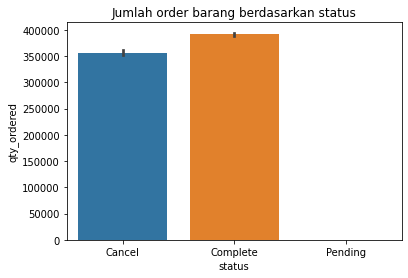

In [55]:
sns.barplot(data=df, x='status', y='qty_ordered', estimator=np.sum)
plt.title('Jumlah order barang berdasarkan status')

Berdasarkan barplot diatas, kita bisa melihat jumlah yang cancel dan complete hampir sama.

### 2. Kategori barang yang paling banyak di cancel berdasarkan Item Id

In [56]:
df[df['status']=='Cancel'].groupby('category_name_1').count()[['item_id']].sort_values(by='item_id', ascending=False).reset_index()

,category_name_1,item_id
0,Mobiles & Tablets,65377
1,Men's Fashion,39020
2,Appliances,26857
3,Women's Fashion,25230
4,Others,19952
5,Superstore,16390
6,Entertainment,14814
7,Beauty & Grooming,13997
8,Home & Living,10258
9,Soghaat,9849


''

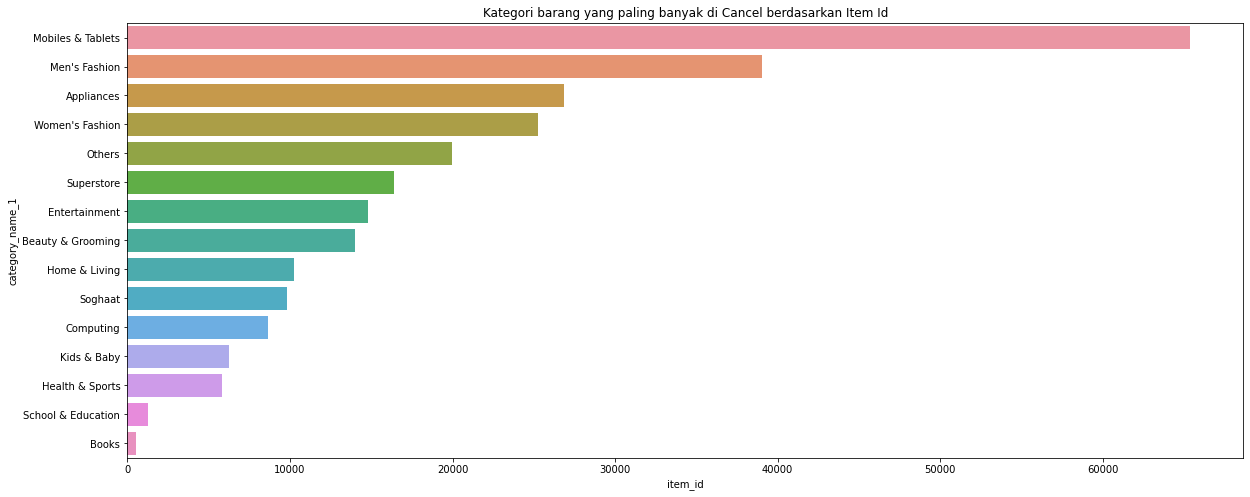

In [57]:
plt.figure(figsize=(20,8))
plt.title('Kategori barang yang paling banyak di Cancel berdasarkan Item Id')
sns.barplot(data=df[df['status']=='Cancel'].groupby('category_name_1').count()[['item_id']].sort_values(by='item_id', ascending=False).reset_index(),
    y='category_name_1', 
    x='item_id',
    estimator=np.sum,
    ci=0)
;

Dari barplot diatas kita bisa melihat ada 3 kategori yang paling banyak di cancel yaitu:
- Mobile & Tablets
- Men's Fashion
- Appliances

### 3. Kategori barang yang paling banyak terjual (transaksi complete) berdasarkan Item Id

In [58]:
df[df['status']=='Complete'].groupby('category_name_1').count()[['item_id']].sort_values(by='item_id', ascending=False).reset_index()

,category_name_1,item_id
0,Men's Fashion,53255
1,Mobiles & Tablets,50298
2,Women's Fashion,34483
3,Beauty & Grooming,27492
4,Superstore,27194
5,Appliances,25540
6,Soghaat,24149
7,Home & Living,16241
8,Health & Sports,11657
9,Entertainment,11495


''

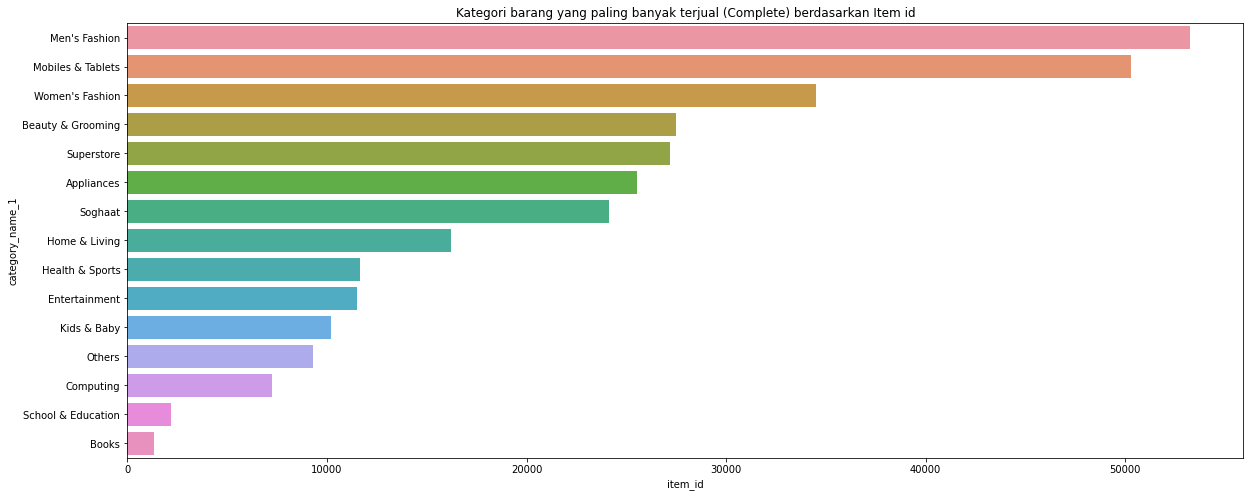

In [59]:
plt.figure(figsize=(20,8))
plt.title('Kategori barang yang paling banyak terjual (Complete) berdasarkan Item id')
sns.barplot(data=df[df['status']=='Complete'].groupby('category_name_1').count()[['item_id']].sort_values(by='item_id', ascending=False).reset_index(),
    y='category_name_1', 
    x='item_id',
    estimator=np.sum,
    ci=0)
;

Dari barplot diatas kita bisa melihat ada 3 kategori yang paling banyak terjual (complete) yaitu:
- Men's Fashion
- Mobile & Tablets
- Women's Fashion

Sedangkan ada 3 kategori yang paling sedikit terjual (complete) yaitu:
- Books
- School & Education
- Computing

### 4. Kategori barang (complete) dengan penjualan(grand_total) tertinggi 

In [60]:
df_comp = df[df['status'] == 'Complete']
df_comp.head()

,item_id,status,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,sku_code,discount
3,211135.0,Complete,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,kcc,83.333333
6,211138.0,Complete,kcc_krone deal,360.0,1.0,60.0,100147449,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,7.0,kcc,83.333333
7,211139.0,Complete,UK_Namkino Mix Nimco 400 Gms,170.0,1.0,170.0,100147450,Soghaat,0.0,cod,7/1/2016,Net,170,2016.0,7.0,2016-7,7-2016,FY17,6.0,UK_,0.000000
10,211142.0,Complete,"GFC_Pedestal Myga Cross Base (Special Guard) 24""",5500.0,1.0,5500.0,100147453,Appliances,0.0,cod,7/1/2016,Net,"5,500",2016.0,7.0,2016-7,7-2016,FY17,9.0,GFC,0.000000
11,211143.0,Complete,BK1070200PL,210.0,1.0,366.0,100147454,Soghaat,0.0,cod,7/1/2016,Valid,210,2016.0,7.0,2016-7,7-2016,FY17,10.0,BK1,0.000000


In [61]:
df_comp.groupby('category_name_1').sum()[['grand_total']].sort_values(by='grand_total', ascending=False).reset_index()

,category_name_1,grand_total
0,Mobiles & Tablets,6.131640e+08
1,Appliances,2.370856e+08
2,Entertainment,1.928859e+08
3,Women's Fashion,1.457724e+08
4,Men's Fashion,8.901711e+07
5,Superstore,6.068759e+07
6,Others,5.878780e+07
7,Beauty & Grooming,5.013297e+07
8,Computing,4.910911e+07
9,Home & Living,4.206294e+07


''

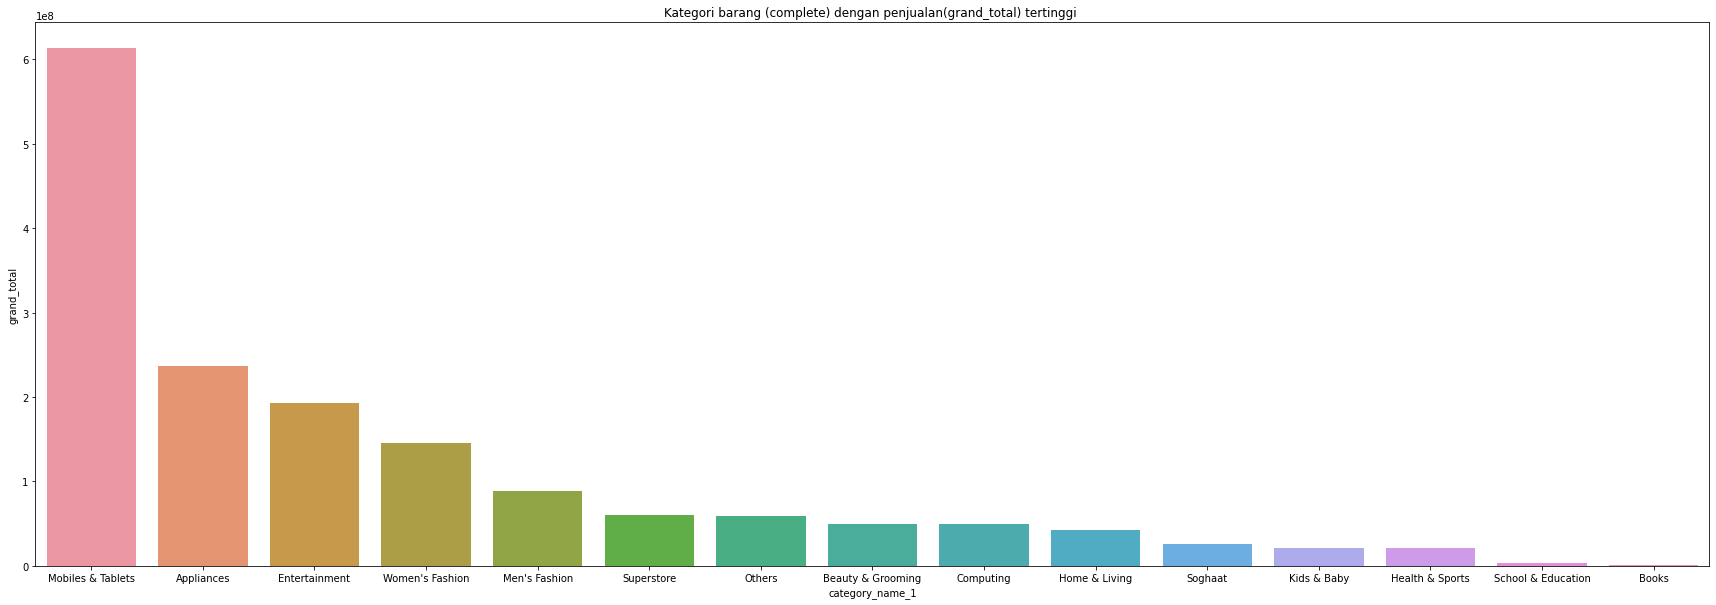

In [62]:
plt.figure(figsize=(30,10))
plt.title('Kategori barang (complete) dengan penjualan(grand_total) tertinggi ')
sns.barplot(
    data=df_comp.groupby('category_name_1').sum()[['grand_total']].sort_values(by='grand_total', ascending=False).reset_index(), 
    x= 'category_name_1', 
    y='grand_total', 
    estimator=np.sum, 
    ci=0)
;

Dari barplot diatas kita bisa melihat dari penjualan (grand_total) ada 5 kategori yang paling tinggi yaitu:
- Mobile & Tablets
- Appliances
- Entertainment
- Women's Fashion
- Men's Fashion

### 5. Mencari metode pembayaran(payment_method) apa yang paling sering digunakan berdasarkan penjualan (grand_total) tertinggi

In [63]:
df_comp.groupby('payment_method').sum()[['grand_total']].sort_values(by='grand_total', ascending=False).reset_index()

,payment_method,grand_total
0,cod,5.429293e+08
1,easypay_voucher,3.214442e+08
2,Payaxis,2.543967e+08
3,Easypay,2.198347e+08
4,jazzvoucher,1.054970e+08
5,bankalfalah,9.218071e+07
6,jazzwallet,3.937028e+07
7,Easypay_MA,2.467846e+07
8,cashatdoorstep,4.118437e+06
9,apg,2.938689e+06


''

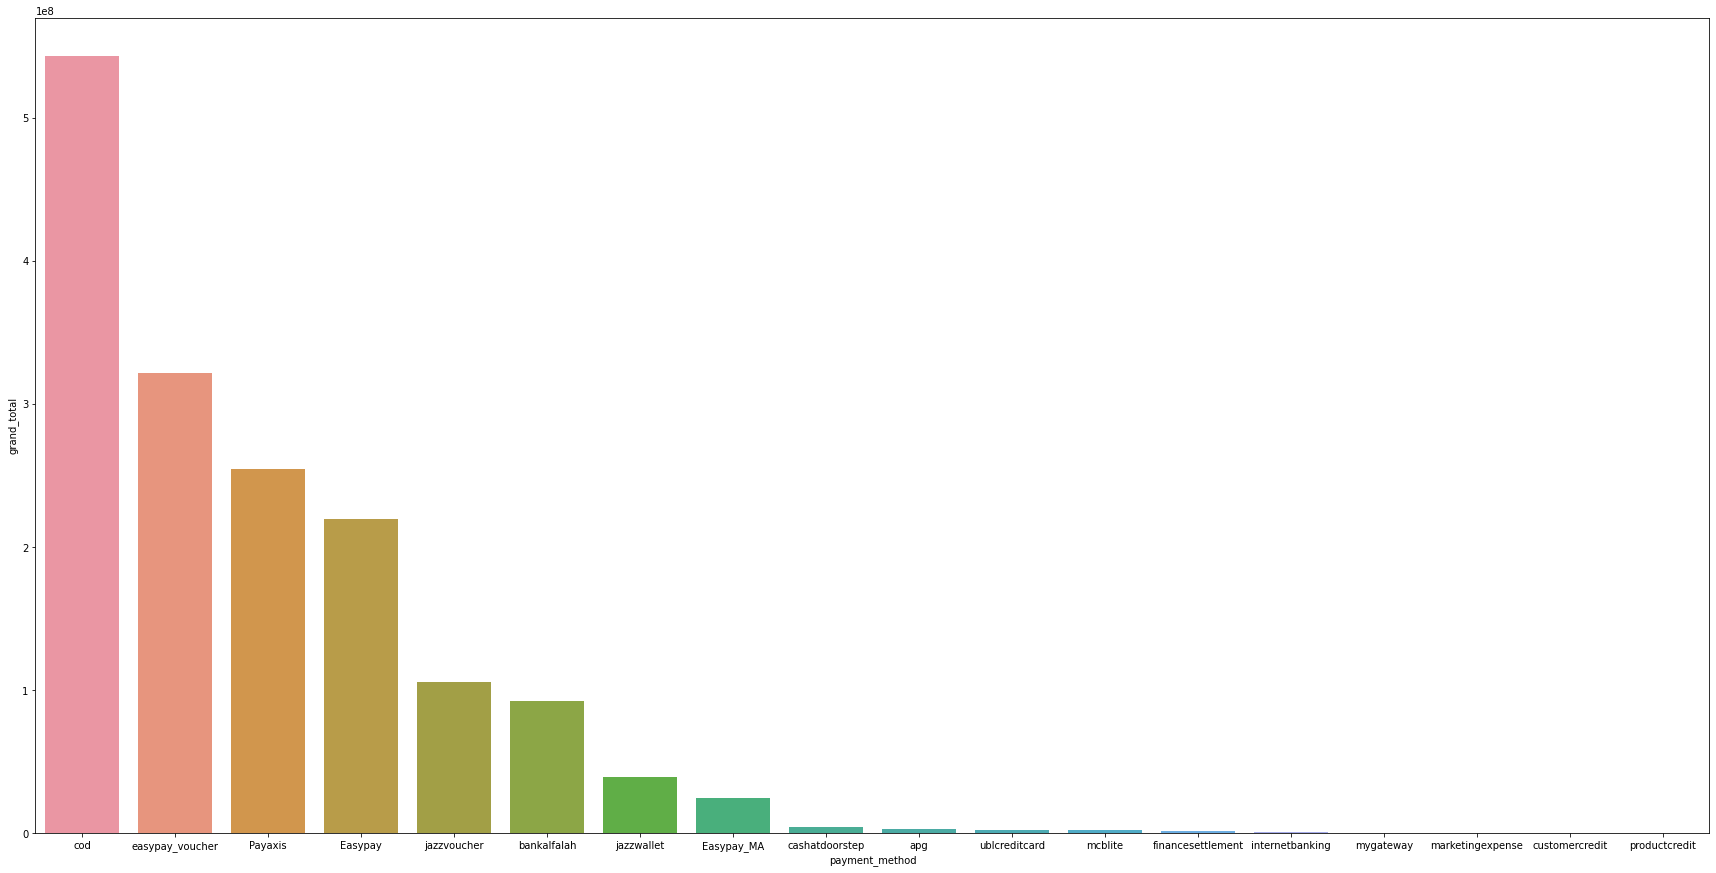

In [64]:
plt.figure(figsize=(30, 15))
sns.barplot(data=df_comp.groupby('payment_method').sum()[['grand_total']].sort_values(by='grand_total', ascending=False).reset_index(),
    x='payment_method', 
    y='grand_total',
    estimator=np.sum, 
    ci=0)
;

Untuk metode pembayaran, COD paling sering digunakan di Pakistan.

### 6. Bulan ke berapa transaksi paling banyak berdasarkan penjualan (grand_total) tertinggi

In [65]:
df_comp.groupby('Month').sum()[['grand_total']].sort_values(by='grand_total', ascending=False).reset_index()

,Month,grand_total
0,11.0,4.548871e+08
1,3.0,2.133129e+08
2,5.0,2.032303e+08
3,2.0,1.692170e+08
4,6.0,1.104930e+08
5,8.0,1.076443e+08
6,4.0,7.455976e+07
7,7.0,7.239734e+07
8,1.0,6.330698e+07
9,12.0,5.384886e+07


''

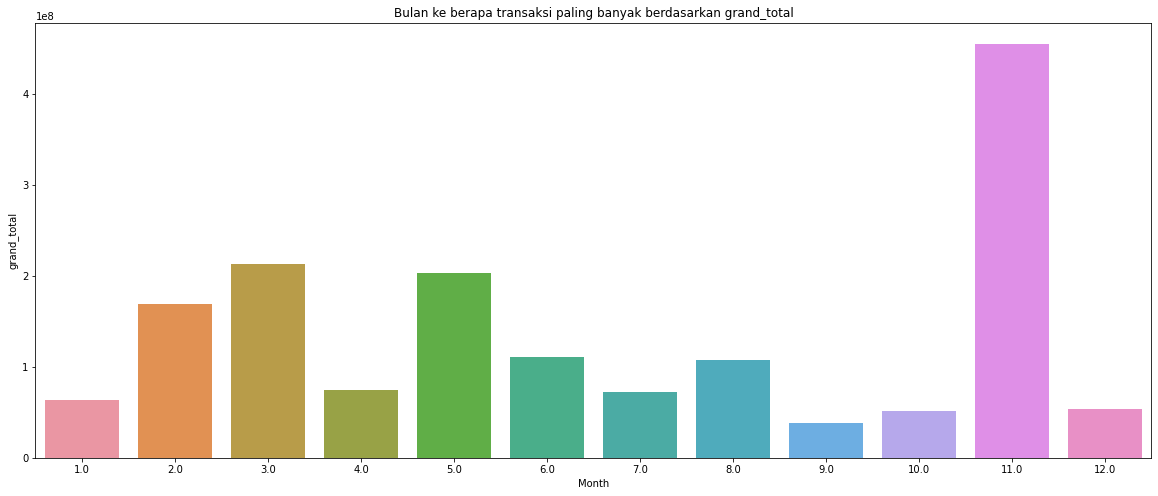

In [66]:
plt.figure(figsize=(20,8))
plt.title('Bulan ke berapa transaksi paling banyak berdasarkan grand_total')
sns.barplot(data=df_comp.groupby('Month').sum()[['grand_total']].sort_values(by='grand_total', ascending=False).reset_index(),
    x='Month', 
    y='grand_total',
    estimator=np.sum,
    ci=0)
;

Di sini kita bisa melihat pada bulan November kenaikan penjualan sangat tinggi

### 7. Kategori barang apa yg paling tinggi penjualannya di tiap tahun

In [67]:
df.groupby(['Year','category_name_1'])[['grand_total']].sum()

grand_total
Year   category_name_1                 
2016.0 Appliances          9.445629e+07
       Beauty & Grooming   1.823377e+07
       Books               6.384552e+05
       Computing           4.150501e+07
       Entertainment       6.582639e+07
       Health & Sports     9.382839e+06
       Home & Living       1.975837e+07
       Kids & Baby         8.018591e+06
       Men's Fashion       4.003369e+07
       Mobiles & Tablets   2.517790e+08
       Others              5.139132e+06
       School & Education  1.653625e+06
       Soghaat             1.389006e+07
       Superstore          1.018907e+07
       Women's Fashion     3.438858e+07
2017.0 Appliances          2.859426e+08
       Beauty & Grooming   5.242840e+07
       Books               1.225816e+06
       Computing           8.120066e+07
       Entertainment       2.538737e+08
       Health & Sports     1.845717e+07
       Home & Living       4.591130e+07
       Kids & Baby         2.333719e+07
       Men's Fashion       1.092396e+08
       Mobiles & Tablets   1.093863e+09
       Others              1.079808e+07
       School & Education  2.917599e+06
       Soghaat             2.293054e+07
       Superstore          6.357073e+07
       Women's Fashion     1.763799e+08
2018.0 Appliances          2.764508e+08
       Beauty & Grooming   2.652251e+07
       Books               8.119236e+05
       Computing           7.985846e+07
       Entertainment       2.192973e+08
       Health & Sports     1.395474e+07
       Home & Living       2.254741e+07
       Kids & Baby         1.588231e+07
       Men's Fashion       4.500417e+07
       Mobiles & Tablets   1.095150e+09
       Others              1.765891e+08
       School & Education  1.665861e+06
       Soghaat             9.522651e+06
       Superstore          3.837107e+07
       Women's Fashion     7.181178e+07

In [68]:
df_year_cat =df.groupby(['Year','category_name_1'])[['grand_total']].sum().sort_values(by='grand_total', ascending=False).reset_index()
df_year_cat

,Year,category_name_1,grand_total
0,2018.0,Mobiles & Tablets,1.095150e+09
1,2017.0,Mobiles & Tablets,1.093863e+09
2,2017.0,Appliances,2.859426e+08
3,2018.0,Appliances,2.764508e+08
4,2017.0,Entertainment,2.538737e+08
5,2016.0,Mobiles & Tablets,2.517790e+08
6,2018.0,Entertainment,2.192973e+08
7,2018.0,Others,1.765891e+08
8,2017.0,Women's Fashion,1.763799e+08
9,2017.0,Men's Fashion,1.092396e+08


<AxesSubplot:title={'center':'Kategori barang yang paling tinggi penjualannya di tiap tahun'}, xlabel='category_name_1', ylabel='grand_total'>

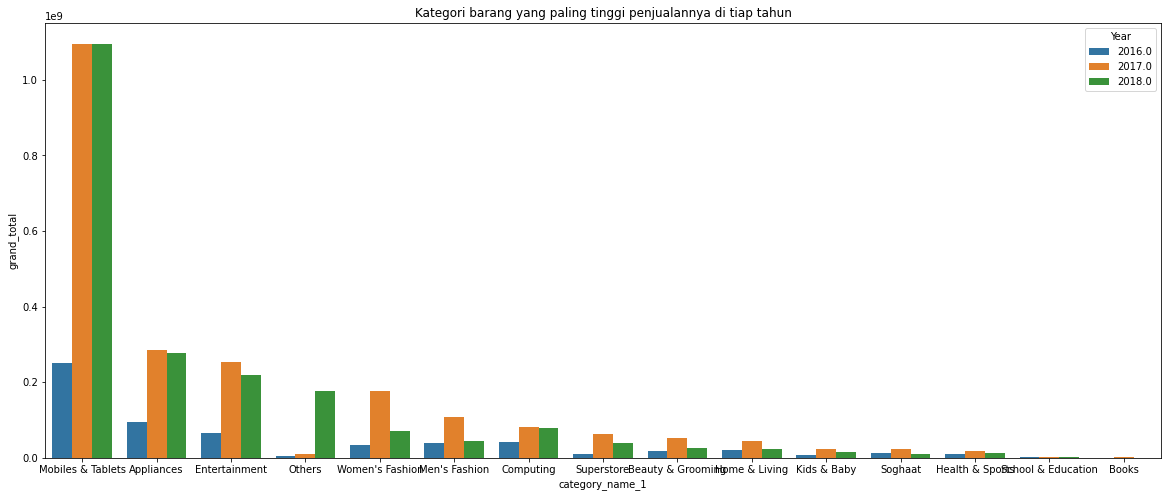

In [69]:
plt.figure(figsize=(20,8))
plt.title('Kategori barang yang paling tinggi penjualannya di tiap tahun')
sns.barplot(data=df_year_cat, hue='Year', y='grand_total', x='category_name_1') 

- Pada tahun 2017 dan 2018, kategori Mobile & Tablets penjualannya masih stabil. 
- Sedangkan pada tahun 2016 kategori Mobile & Tablets penjualannya itu berbeda karena data yang kita peroleh mulai dari bulan Maret. Begitu juga dengan kategori barang lainnya.
- Di kategori barang Others itu pada tahun 2018 sangat meningkat dibandingkan tahun 2016 & 2017.

### 8. Kategori barang yang paling sering discount

In [70]:
df.groupby('category_name_1').mean()[['discount']].sort_values(by='discount', ascending=False).reset_index()

,category_name_1,discount
0,Others,72.008237
1,School & Education,60.922924
2,Kids & Baby,59.624951
3,Beauty & Grooming,41.156231
4,Soghaat,23.511931
5,Computing,20.995557
6,Health & Sports,20.729464
7,Women's Fashion,17.958618
8,Appliances,16.838338
9,Men's Fashion,11.367396


''

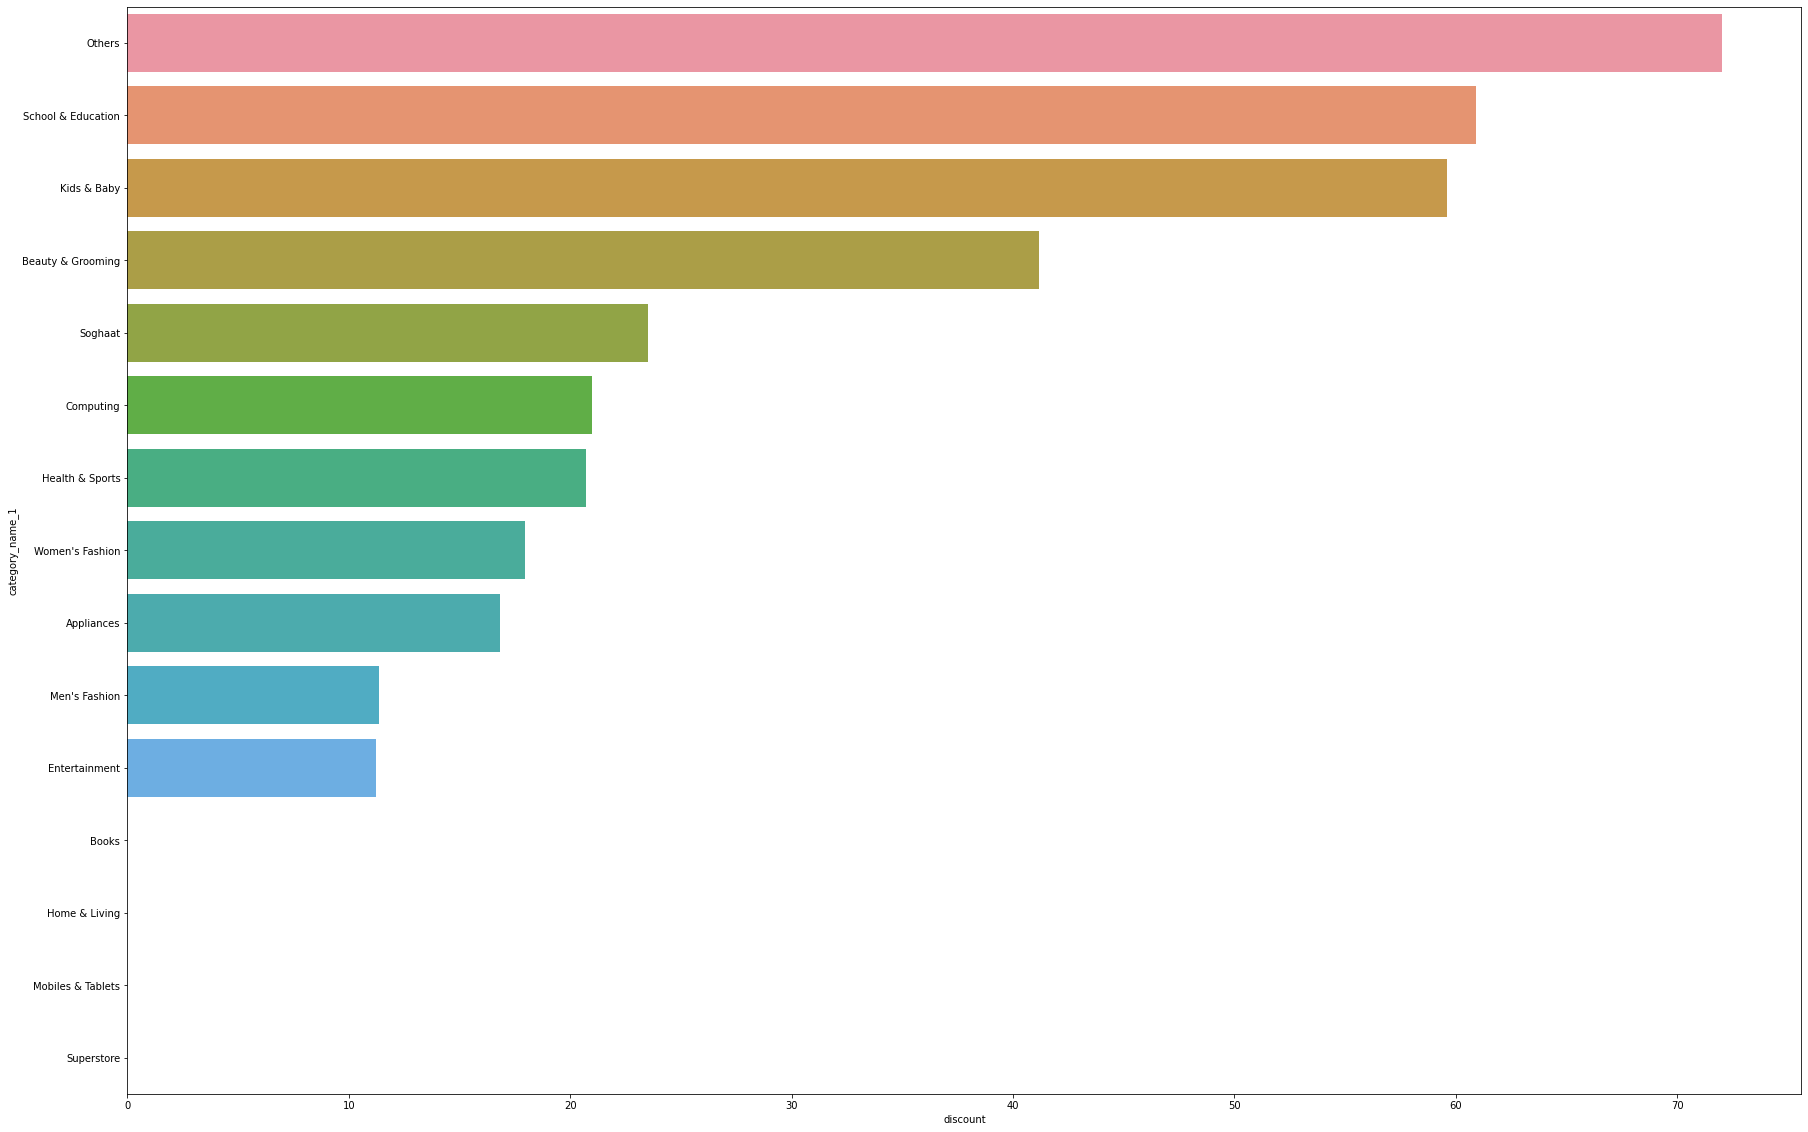

In [71]:
plt.figure(figsize=(30, 20))
sns.barplot(data=df.groupby('category_name_1').mean()[['discount']].sort_values(by='discount', ascending=False).reset_index(),
    x='discount', 
    y='category_name_1',
    estimator=np.sum, 
    ci=0)
;

Kita dapat melihat ada 3 kategori barang yang paling sering memberi discount yaitu:
- Others
- School & Education
- Kids & Baby

Sedangkan ada beberapa kategori barang yang tidak pernah memberi discount yaitu:
- Superstore	
- Mobile & Tablets
- Home & Living
- Books

In [72]:
df.to_csv('cleanbanget.csv')

### Kesimpulan

- Jumlah transakski yang cancel dan complete hampir sama.
- Top 3 kategori yang paling banyak di cancel berdasarkan item id yaitu Mobile & Tablets, Men's Fashion & Appliances
- Top 3 kategori yang paling banyak terjual (complete) berdasarkan item id yaitu: Men's Fashion, Mobile & Tablets & Women's Fashion
- Berdasarkan penjualan (grand_total) ada 5 kategori yang paling tinggi yaitu: Mobile & Tablets, Appliances, Entertainment, Women's Fashion dan Men's Fashion
- Kita bisa menarik kesimpulan juga, meskipun kategori Men's Fashion memliki jumlah barang yang paling laris dibandingkan Women Fashion, tetapi di penjualan (grand_total) Men's Fashion ada di bawah Women's Fashion. Ini bisa jadi disebabkan karena harga barang dari Men's Fashion lebih murah dibandingkan Women's Fashion.
- Mobile & Tablets adalah barang yang paling laris tetapi termasuk barang yang paling sering di cancel juga.
- Kategori Appliances termasuk barang yang sering di cancel, tetapi masuk ke dalam kategori yang paling tinggi terjual. Ini dikarenakan kategori Appliances termasuk barang- barang pokok yang sering dibutuhkan.
- Untuk metode pembayaran, COD paling sering digunakan di Pakistan. Dan metode pembayaran credit card paling rendah dipakai.
- Penjualan sangat tinggi ada di bulan November.
- Tiap tahun Mobile & Tablets barang yang paling tinggi penjualannya, walaupun tidak pernah memberi potongan atau diskon

### Rekomendasi 

- Mungkin barang premium seperti mobile & tablets yg cancel bisa kena pemotongan point lolyalti atau pengurangan diskon.
- Di Pakistan metode pembayaran credit card sangat jarang digunakan, jadi bisa dihilangkan saja dan lebih fokus ke pembayaran COD atau pemakaian voucher
- Pada bulan November penjualan sangat tinggi, jadi server pada bulan inki harus lebih diperhatikan agar tidak down pada saat di akses
- Untuk kategori Books untuk meningkatkan penjualan, lebih baik di berikan potongan atau diskon yang lebih besar
